# Análisis Exploratorio

In [126]:
import pandas as pd
import requests
import time
import os
from pathlib import Path

FUENTE: https://www.juntadeandalucia.es/agriculturaypesca/ifapa/riaws/swagger-ui.html#/dato-diario-controller/getDatosDiariosPorIntervaloConEt0UsingGET

In [20]:
url_provincia = "https://www.juntadeandalucia.es/agriculturaypesca/ifapa/riaws/provincias"
response = requests.get(url_provincia)
print(response)

<Response [403]>


Cuando intentamos consultar los datos de la API directamente, obtenemos un error 403 forbidden. Tras revisar la documentación, se identifica que la API es abierta y que no tiene API Token. Por eso, se opta por añadir un User-agent. Tras esto, se obtienen los datos correctamente.

In [23]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

url_provincia = "https://www.juntadeandalucia.es/agriculturaypesca/ifapa/riaws/provincias"
response = requests.get(url_provincia, headers=headers)
print(response)

<Response [200]>


In [27]:
res_provincias = response.json()
print(res_provincias)

[{'id': 15, 'nombre': 'A Coruña'}, {'id': 2, 'nombre': 'Albacete'}, {'id': 3, 'nombre': 'Alicante'}, {'id': 4, 'nombre': 'Almería'}, {'id': 6, 'nombre': 'Badajoz'}, {'id': 8, 'nombre': 'Barcelona'}, {'id': 9, 'nombre': 'Burgos'}, {'id': 39, 'nombre': 'Cantabria'}, {'id': 12, 'nombre': 'Castellón'}, {'id': 51, 'nombre': 'Ceuta'}, {'id': 13, 'nombre': 'Ciudad Real'}, {'id': 31, 'nombre': 'Comunidad Foral de Navarra'}, {'id': 16, 'nombre': 'Cuenca'}, {'id': 10, 'nombre': 'Cáceres'}, {'id': 11, 'nombre': 'Cádiz'}, {'id': 14, 'nombre': 'Córdoba'}, {'id': 17, 'nombre': 'Girona'}, {'id': 18, 'nombre': 'Granada'}, {'id': 19, 'nombre': 'Guadalajara'}, {'id': 20, 'nombre': 'Guipúzcoa'}, {'id': 21, 'nombre': 'Huelva'}, {'id': 22, 'nombre': 'Huesca'}, {'id': 7, 'nombre': 'Islas Baleares'}, {'id': 23, 'nombre': 'Jaén'}, {'id': 26, 'nombre': 'La Rioja'}, {'id': 35, 'nombre': 'Las Palmas de Gran Canaria'}, {'id': 24, 'nombre': 'León'}, {'id': 25, 'nombre': 'Lleida'}, {'id': 27, 'nombre': 'Lugo'}, {'i

Vemos que la API nos devuele todas las provincias de España. En nuestro caso, solo nos interesan las provincias de Andalucía.

In [18]:
provincias_andalucia = ["Almería", "Cádiz", "Córdoba", "Granada","Huelva", "Jaén", "Málaga", "Sevilla"]

In [ ]:
id_provincias = [e for e in res_provincias if e["nombre"] in provincias_andalucia]

In [29]:
id_provincias

[{'id': 4, 'nombre': 'Almería'},
 {'id': 11, 'nombre': 'Cádiz'},
 {'id': 14, 'nombre': 'Córdoba'},
 {'id': 18, 'nombre': 'Granada'},
 {'id': 21, 'nombre': 'Huelva'},
 {'id': 23, 'nombre': 'Jaén'},
 {'id': 29, 'nombre': 'Málaga'},
 {'id': 41, 'nombre': 'Sevilla'}]

In [34]:
url_estaciones = "https://www.juntadeandalucia.es/agriculturaypesca/ifapa/riaws/estaciones/"

In [52]:
estaciones = pd.DataFrame()

for i in id_provincias:
    response = requests.get(url_estaciones+str(i['id']), headers=headers)
    if response.status_code == 200:
        response = response.json()
        df_temp = pd.DataFrame(response)
        estaciones = pd.concat([estaciones, df_temp], ignore_index=True)

In [53]:
estaciones

,provincia,codigoEstacion,nombre,bajoplastico,activa,visible,longitud,latitud,altitud,xutm,yutm,huso
0,"{'id': 4, 'nombre': 'Almería'}",10,Adra,False,True,True,025932000W,364448000N,2,500683.0,4066780.0,30
1,"{'id': 4, 'nombre': 'Almería'}",2,Almería,False,True,True,022408000W,365007000N,5,553282.0,4076780.0,30
2,"{'id': 4, 'nombre': 'Almería'}",8,Cuevas de Almanzora,False,True,True,014801000W,371524000N,28,606367.0,4124030.0,30
3,"{'id': 4, 'nombre': 'Almería'}",5,Fiñana,False,True,True,025019000W,370924000N,958,514311.0,4112270.0,30
4,"{'id': 4, 'nombre': 'Almería'}",7,Huércal-Overa,False,True,True,015303000W,372444000N,303,598735.0,4141210.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...
118,"{'id': 41, 'nombre': 'Sevilla'}",18,Puebla Cazalla,False,True,True,052103000W,371305000N,193,291408.0,4121660.0,30
119,"{'id': 41, 'nombre': 'Sevilla'}",13,Sanlúcar La Mayor,False,True,True,061518000W,372518000N,63,211943.0,4146640.0,30
120,"{'id': 41, 'nombre': 'Sevilla'}",6,Villafranco del Guadalquivir,False,False,True,060904000W,370554000N,45,219935.0,4110450.0,30
121,"{'id': 41, 'nombre': 'Sevilla'}",22,Villanueva del Río y Minas,False,True,True,054119000W,373533000N,31,262609.0,4164000.0,30


Vamos a separar la provincia en nombre e id:

In [54]:
estaciones[['provincia_id', 'provincia_nombre']] = estaciones['provincia'].apply(pd.Series)
estaciones = estaciones.drop(columns=['provincia'])
estaciones.head()

,codigoEstacion,nombre,bajoplastico,activa,visible,longitud,latitud,altitud,xutm,yutm,huso,provincia_id,provincia_nombre
0,10,Adra,False,True,True,025932000W,364448000N,2,500683.0,4066780.0,30,4,Almería
1,2,Almería,False,True,True,022408000W,365007000N,5,553282.0,4076780.0,30,4,Almería
2,8,Cuevas de Almanzora,False,True,True,014801000W,371524000N,28,606367.0,4124030.0,30,4,Almería
3,5,Fiñana,False,True,True,025019000W,370924000N,958,514311.0,4112270.0,30,4,Almería
4,7,Huércal-Overa,False,True,True,015303000W,372444000N,303,598735.0,4141210.0,30,4,Almería


In [55]:
estaciones.shape

(123, 13)

Disponemos de 123 estaciones. Uno de los campos indica si la estación está actualmente activa o no. Para este trabajo, solo vamos a tener en cuenta las estaciones que estén actualmente activas.

activa
True     101
False     22
Name: count, dtype: int64


<Axes: xlabel='activa'>

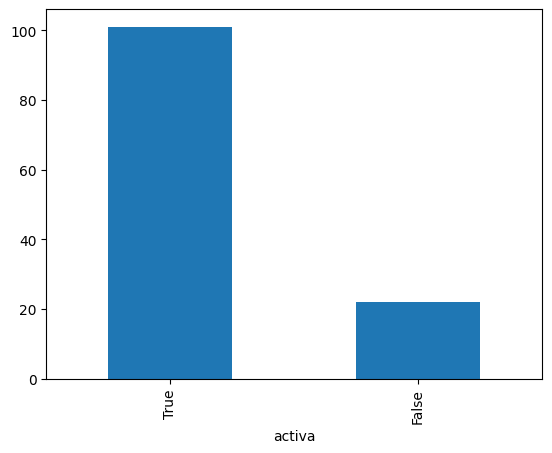

In [62]:
print(estaciones['activa'].value_counts())
estaciones['activa'].value_counts().plot(kind='bar')

In [65]:
print(estaciones[estaciones['activa']==0]["provincia_nombre"].value_counts())


provincia_nombre
Sevilla    4
Huelva     4
Cádiz      3
Jaén       3
Granada    2
Córdoba    2
Almería    2
Málaga     2
Name: count, dtype: int64


In [74]:
duplicadas = estaciones[estaciones["nombre"].duplicated(keep=False)]
duplicadas

,codigoEstacion,nombre,bajoplastico,activa,visible,longitud,latitud,altitud,xutm,yutm,huso,provincia_id,provincia_nombre
6,11,Níjar,False,True,True,020929000W,365702000N,169,574960.00,4089720.0,30,4,Almería
7,3,Níjar,False,False,True,020735000W,365645000N,158,577785.00,4089250.0,30,4,Almería
9,9,Tíjola,False,False,True,022725000W,372218000N,740,548076.00,4136270.0,30,4,Almería
10,12,Tíjola,False,True,True,022734000W,372242000N,776,547839.00,4137000.0,30,4,Almería
17,10,Puerto de Santa María,False,True,True,061017320W,363615937N,3,216316.92,4055676.0,30,11,Cádiz
18,8,Puerto de Santa María,False,False,True,060908000W,363658000N,20,218061.00,4056940.0,30,11,Cádiz
19,3,Sanlúcar de Barrameda,False,False,True,061743000W,365002000N,22,206106.00,4081540.0,30,11,Cádiz
20,11,Sanlúcar de Barrameda,False,True,True,061948000W,364308000N,29,202554.00,4068870.0,30,11,Cádiz
21,9,Sanlúcar de Barrameda,False,False,True,061848000W,364650000N,22,204285.00,4075660.0,30,11,Cádiz
35,9,Almuñecar,False,False,True,034039000W,364421000N,49,439500.00,4066160.0,30,18,Granada


In [75]:
duplicadas.shape

(21, 13)

In [76]:
estaciones = estaciones[estaciones['activa']==True]

In [79]:
print(estaciones.shape)
estaciones.head()

(101, 13)


,codigoEstacion,nombre,bajoplastico,activa,visible,longitud,latitud,altitud,xutm,yutm,huso,provincia_id,provincia_nombre
0,10,Adra,False,True,True,025932000W,364448000N,2,500683.0,4066780.0,30,4,Almería
1,2,Almería,False,True,True,022408000W,365007000N,5,553282.0,4076780.0,30,4,Almería
2,8,Cuevas de Almanzora,False,True,True,014801000W,371524000N,28,606367.0,4124030.0,30,4,Almería
3,5,Fiñana,False,True,True,025019000W,370924000N,958,514311.0,4112270.0,30,4,Almería
4,7,Huércal-Overa,False,True,True,015303000W,372444000N,303,598735.0,4141210.0,30,4,Almería


In [80]:
duplicadas = estaciones[estaciones["nombre"].duplicated(keep=False)]
duplicadas

,codigoEstacion,nombre,bajoplastico,activa,visible,longitud,latitud,altitud,xutm,yutm,huso,provincia_id,provincia_nombre


provincia_nombre
Sevilla    19
Jaén       18
Huelva     14
Granada    12
Almería    10
Málaga     10
Córdoba     9
Cádiz       9
Name: count, dtype: int64


<Axes: ylabel='provincia_nombre'>

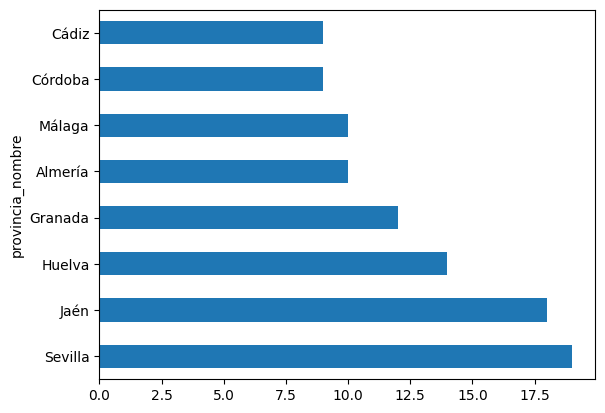

In [82]:
print(estaciones['provincia_nombre'].value_counts())
estaciones['provincia_nombre'].value_counts().plot(kind='barh')

Rango histórico: 2001 a actualidad

In [114]:
fhInicio = "2005-01-01"
fhFin = "2025-08-01"

In [91]:
prov_est = estaciones.groupby("provincia_id")["codigoEstacion"].apply(list).to_dict()
print(prov_est)

{4: ['10', '2', '8', '5', '7', '1', '11', '4', '12', '6'], 11: ['1', '5', '101', '2', '7', '10', '11', '6', '4'], 14: ['8', '1', '6', '5', '4', '101', '102', '9', '7'], 18: ['11', '1', '7', '102', '101', '5', '6', '3', '10', '12', '2', '8'], 21: ['10', '103', '6', '8', '3', '11', '102', '101', '9', '7', '2', '12', '5', '107'], 23: ['6', '11', '1', '104', '15', '103', '12', '17', '7', '16', '2', '4', '3', '14', '5', '101', '8', '102'], 29: ['10', '11', '9', '4', '101', '7', '1', '8', '6', '2'], 41: ['5', '9', '17', '19', '101', '21', '20', '10', '7', '8', '12', '2', '3', '15', '16', '11', '18', '13', '22']}


In [130]:
raw_data_path = "../../data/raw/"

descargados = [
    os.path.splitext(f)[0].split("_")[1]
    for f in os.listdir(raw_data_path)
    if f.endswith(".csv") and "historico_" in f
]

print("Iniciando la descarga de datos históricos...")
print(f"Archivos ya descargadas: {', '.join(descargados) if descargados else 'Ninguna'}")

for provincia_id, estaciones_list in prov_est.items():
    
    if str(provincia_id) in descargados:
        print(f"La provincia {provincia_id} ya ha sido descargada. Omitiendo...")
        continue
    
    print(f"\n--- Descargando provincia {provincia_id} con {len(estaciones_list)} estaciones ---")
    df_prov_diario = pd.DataFrame()
    for est in estaciones_list:
        url = f"https://www.juntadeandalucia.es/agriculturaypesca/ifapa/riaws/datosdiarios/forceEt0/{provincia_id}/{est}/{fhInicio}/{fhFin}"
        
        try:
            response = requests.get(url, headers=headers, timeout=30)
            if response.status_code == 200:
                print(f"{response.status_code} - Estación {est} en provincia {provincia_id}.")
                response = response.json()
                df_temp = pd.DataFrame(response)
                df_temp["provincia_id"] = provincia_id
                df_temp["codigoEstacion"] = est
                df_prov_diario = pd.concat([df_prov_diario, df_temp], ignore_index=True)
            
            else:
                print(f"Error {response.status_code} para la estación {est} en la provincia {provincia_id}.")
        
        except requests.exceptions.RequestException as e:
            print(f"Error de conexión para la estación {est} en la provincia {provincia_id}: {e}")
            raise SystemExit(e)
            

        time.sleep(1)
                
    df_prov_diario.to_csv(f"{raw_data_path}/historico_{provincia_id}.csv", index=False)
    print(f"Datos de la provincia {provincia_id} guardados correctamente.")
    


Iniciando la descarga de datos históricos...
Archivos ya descargadas: 11, 23, 18, 14, 21, 4, 29
La provincia 4 ya ha sido descargada. Omitiendo...
La provincia 11 ya ha sido descargada. Omitiendo...
La provincia 14 ya ha sido descargada. Omitiendo...
La provincia 18 ya ha sido descargada. Omitiendo...
La provincia 21 ya ha sido descargada. Omitiendo...
La provincia 23 ya ha sido descargada. Omitiendo...
La provincia 29 ya ha sido descargada. Omitiendo...

--- Descargando provincia 41 con 19 estaciones ---
200 - Estación 5 en provincia 41.
200 - Estación 9 en provincia 41.
200 - Estación 17 en provincia 41.
200 - Estación 19 en provincia 41.
200 - Estación 101 en provincia 41.
200 - Estación 21 en provincia 41.
200 - Estación 20 en provincia 41.
200 - Estación 10 en provincia 41.
200 - Estación 7 en provincia 41.
200 - Estación 8 en provincia 41.
200 - Estación 12 en provincia 41.
200 - Estación 2 en provincia 41.
200 - Estación 3 en provincia 41.
200 - Estación 15 en provincia 41.
200 

Código para descargar los datos por estación:

In [ ]:
raw_data_path = "../../data/raw/"


print("Iniciando la descarga del histórico")
ruta_data = Path("../../data/raw/")

for provincia_id, estaciones_list in prov_est.items():
    
    print(f"\n--- Datos Provincia {provincia_id} con {len(estaciones_list)} estaciones ---")
 
    for est in estaciones_list:

        ruta_csv = ruta_data / f"historico_{provincia_id}_{est}.csv"

        if ruta_csv.exists():
            print(f"El arhcivo {ruta_csv} ya existe. Omitimos descarga")
            continue

        url = f"https://www.juntadeandalucia.es/agriculturaypesca/ifapa/riaws/datosdiarios/forceEt0/{provincia_id}/{est}/{fhInicio}/{fhFin}"
        
        try:
            response = requests.get(url, headers=headers, timeout=30)
            if response.status_code == 200:
                print(f"{response.status_code} - Estación {est} en provincia {provincia_id}.")
                response = response.json()
                df_temp = pd.DataFrame(response)
                df_temp["provincia_id"] = provincia_id
                df_temp["codigoEstacion"] = est
                df_temp.to_csv(ruta_csv, index=False)
            
            else:
                print(f"Error {response.status_code} para la estación {est} en la provincia {provincia_id}.")
        
        except requests.exceptions.RequestException as e:
            print(f"Error de conexión para la estación {est} en la provincia {provincia_id}: {e}")
            continue
            

        time.sleep(0.5)
    print(f"Datos de la provincia {provincia_id} guardados correctamente.")

print("\n--- Proceso de descarga finalizado. ---")

Vamos a proceder a unificar los dataset en uno solo

In [141]:
files = Path(raw_data_path).glob('*.csv')

In [142]:
historico = pd.DataFrame()
list_data = []
for file in files:
    df = pd.read_csv(file)
    print(df.shape)
    list_data.append(df)

(61421, 24)
(124599, 24)
(79958, 24)
(65993, 24)
(79120, 24)
(137367, 24)
(74247, 24)
(68004, 24)


In [144]:
df_historico_total = pd.concat(list_data, axis=0, ignore_index=True)

In [145]:
df_historico_total

,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,horMinHumMax,...,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion,bateria,fechaUtlMod,et0,provincia_id,codigoEstacion
0,2005-01-01,1,9.07,18.58,14:30,0.658,07:20,67.31,87.2,07:40,...,5.008,11:51,338.1,11.110,0.0,12.93,2005-01-02T07:34:55.000+0100,1.495588,11,1
1,2005-01-02,2,9.02,12.17,14:50,5.810,21:30,84.70,91.8,23:30,...,4.106,15:44,333.5,4.173,0.0,12.92,2005-01-03T07:37:28.000+0100,0.776324,11,1
2,2005-01-03,3,8.18,15.91,14:20,3.196,06:10,80.60,92.9,11:50,...,5.174,14:43,318.2,9.090,0.2,12.94,2005-01-04T07:34:53.000+0100,1.327342,11,1
3,2005-01-04,4,10.55,18.26,12:40,3.608,07:30,68.63,87.2,06:50,...,7.680,12:48,116.6,10.400,0.0,12.93,2005-01-05T07:34:53.000+0100,1.796508,11,1
4,2005-01-05,5,9.82,17.78,14:50,2.802,07:30,67.62,87.5,06:10,...,4.508,11:12,145.7,11.090,0.0,12.93,2005-01-06T07:35:04.000+0100,1.371563,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690704,2025-07-28,209,25.79,34.22,14:24,16.380,05:06,57.00,77.9,00:00,...,3.871,12:18,176.3,27.160,0.0,12.58,2025-07-30T09:30:00.000+0200,5.506832,29,2
690705,2025-07-29,210,26.38,31.64,11:34,20.890,04:00,66.03,88.7,04:30,...,4.665,12:13,174.4,26.200,0.0,12.62,2025-07-31T09:30:00.000+0200,5.420915,29,2
690706,2025-07-30,211,26.93,32.10,11:46,23.950,05:22,62.58,76.6,21:38,...,4.988,11:38,154.8,26.540,0.0,12.63,2025-08-01T09:30:00.000+0200,5.548270,29,2
690707,2025-07-31,212,26.17,32.24,10:52,20.560,05:06,59.88,85.1,05:20,...,5.645,12:01,204.1,26.640,0.0,12.59,2025-08-02T09:30:00.000+0200,5.469182,29,2


In [146]:
historico = df_historico_total.to_csv("../../data/raw/historico_completo.csv", index=False)

Una vez generados los archivos, aplicamos DVC para control de versión.

dvc init   
dvc add ruta_archivo.csv